# Canary Silver
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [10]:
!./get_logs.sh 172.18.5.120 300000
!./parse_logs.sh
!ls ../data/

metric.csv  safirortb.log


In [11]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812112e+13, 4.45000000e+02, 4.30000000e+01, ...,
        1.55800000e-01, 5.00000000e+00, 4.00000000e+00],
       [2.01812112e+13, 5.61000000e+02, 2.52000000e+02, ...,
        1.11100000e-01, 2.00000000e+00, 7.00000000e+00],
       [2.01812112e+13, 5.73000000e+02, 2.71000000e+02, ...,
        8.85000000e-02, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.01812112e+13, 4.46000000e+02, 1.91000000e+02, ...,
        4.76000000e-02, 0.00000000e+00, 8.00000000e+00],
       [2.01812112e+13, 4.58000000e+02, 2.30000000e+02, ...,
        5.03000000e-02, 1.00000000e+00, 1.20000000e+01],
       [2.01812112e+13, 4.55000000e+02, 2.38000000e+02, ...,
        5.07000000e-02, 1.00000000e+00, 4.00000000e+00]])

In [12]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
fn = get_serie(dataset, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(454.8099547511312, 120.65783773708445)

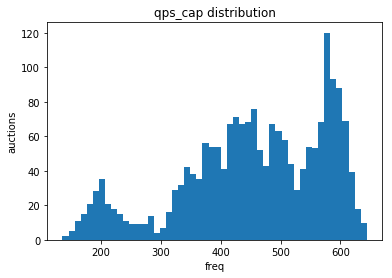

In [13]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(190.73102061337354, 85.09426676523985)

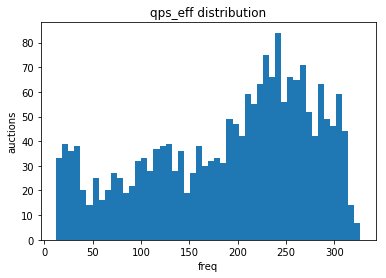

In [14]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(0.00243604826546003, 0.0009749722094159874)

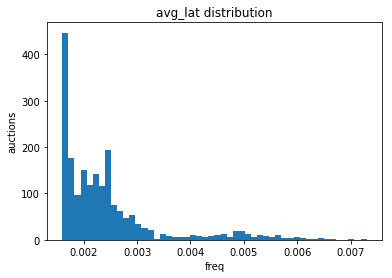

In [15]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(5.419306184012067, 3.7835011784971417)

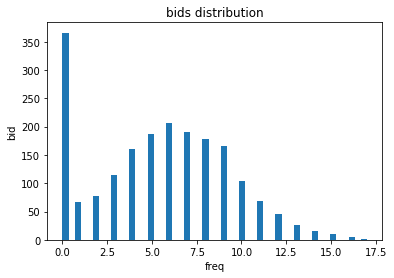

In [16]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('bid');
fn.mean(),math.sqrt(fn.var())

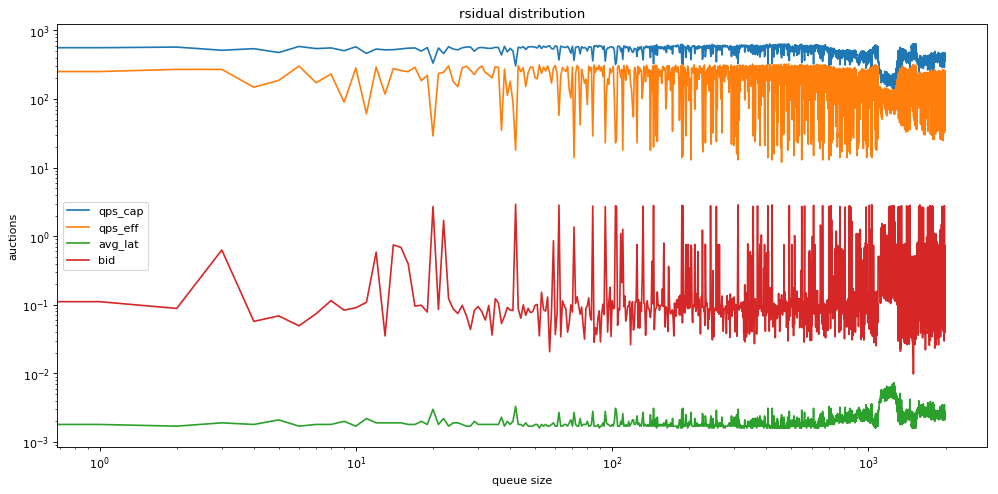

In [17]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1], label="qps_cap")
plt.plot(dataset[:, 2], label="qps_eff")
plt.plot(dataset[:, 3], label="avg_lat")
plt.plot(dataset[:, 4], label="bid")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()